# Financial Data Analysis Project

FinTech is interested in predicting expenses for a particular financial line item as a % of Gross Bookings. To
help explore this question, we were provided a sample dataset of vendors associated with this line item, the
expenses paid out, and the total Gross Bookings attributed to that vendor and product.

Unfortunately, I won't be able to share the data as it would be a violation of one of the policy of the company for which the project was done.  

### 1. Performing any cleaning, exploratory analysis, and/or visualizations to use the provided data for the analysis.

In [3463]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # Data Analysis
import matplotlib.pyplot as plt #data viz.
import seaborn as sb #data viz.
from sklearn.metrics import mean_squared_error #for evaluating our model
import random
random.seed(3)

%matplotlib inline

In [3464]:
df =  pd.read_csv('/Users/hthakkar/Downloads/Fintech Exercise.csv')
df.head()

,Date,Vendor Name,Country,Product,Gross Bookings,Fees
0,1/1/15,Vendor A,Country 1,Product 1,63.34,0.94
1,1/1/15,Vendor A,Country 2,Product 2,39295.41,2169.53
2,1/1/15,Vendor A,Country 3,Product 3,127.25,3.44
3,1/1/15,Vendor A,Country 4,Product 1,4.85,0.11
4,1/1/15,Vendor A,Country 5,Product 4,4734.94,171.13


In [3465]:
df.columns = ['Date', 'Vendor_Name', 'Country', 'Product', 'Gross_Bookings', 'Fees']

In [3467]:
df.shape

(7911, 6)

In [3468]:
df.dtypes

Date              object
Vendor_Name       object
Country           object
Product           object
Gross_Bookings    object
Fees              object
dtype: object

## Data Cleaning

Let us first convert columns to their appropriate data type which would help us do operations on them later on.

In [3469]:
#converting columns to apt data types
import datetime as dt
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format = True)
df['Fees'] = pd.to_numeric(df['Fees'], errors='coerce')
df['Gross_Bookings'] = pd.to_numeric(df['Gross_Bookings'], errors='coerce')

In [3470]:
df.dtypes

Date              datetime64[ns]
Vendor_Name               object
Country                   object
Product                   object
Gross_Bookings           float64
Fees                     float64
dtype: object

In [3471]:
#checking for nulls
df.isnull().sum()

Date                0
Vendor_Name         0
Country             4
Product             0
Gross_Bookings    238
Fees               51
dtype: int64

In [3472]:
df.head()

,Date,Vendor_Name,Country,Product,Gross_Bookings,Fees
0,2015-01-01,Vendor A,Country 1,Product 1,63.34,0.94
1,2015-01-01,Vendor A,Country 2,Product 2,39295.41,2169.53
2,2015-01-01,Vendor A,Country 3,Product 3,127.25,3.44
3,2015-01-01,Vendor A,Country 4,Product 1,4.85,0.11
4,2015-01-01,Vendor A,Country 5,Product 4,4734.94,171.13


In [3473]:
df.dtypes

Date              datetime64[ns]
Vendor_Name               object
Country                   object
Product                   object
Gross_Bookings           float64
Fees                     float64
dtype: object

In [3474]:
df.isnull().sum()

Date                0
Vendor_Name         0
Country             4
Product             0
Gross_Bookings    238
Fees               51
dtype: int64

Let us see if there are any negative values in Gross_Bookings or Fees column. If so, we will convert them into their absolute (positive) values as itis unlikely to have Gross_Bookings or Fees as a negative number.

In [3475]:
#check for negative values of fees
df[df['Fees'] < 0]

,Date,Vendor_Name,Country,Product,Gross_Bookings,Fees
4339,2015-11-01,Vendor J,Country 35,Product 9,-41.39,-0.29
4814,2015-12-01,Vendor J,Country 35,Product 9,-14.26,-0.03
4918,2015-12-01,Vendor J,Country 55,Product 9,-7.54,-0.12
4956,2015-12-01,Vendor J,Country 35,Product 4,-3.41,-0.01


In [3476]:
#check for negative values of gross bookings
df[df['Gross_Bookings'] < 0].shape

(71, 6)

In [3477]:
#converting negatives into their absolute values
pd.options.mode.chained_assignment = None

df['Gross_Bookings'] = df['Gross_Bookings'].abs()
df['Fees'] = df['Fees'].abs()

Let us remove rows with null in country column as they are just 4 rows.

In [3478]:
df = df.dropna(subset= ['Country'])
df.shape

(7907, 6)

In [3479]:
df.isnull().sum()

Date                0
Vendor_Name         0
Country             0
Product             0
Gross_Bookings    238
Fees               51
dtype: int64

Let us remove rows that has null in both gross booking & fees columns.

In [3480]:
df[(df['Gross_Bookings'].isnull()) & (df['Fees'].isnull())].shape

(17, 6)

In [3481]:
df = df[(df['Gross_Bookings'].notnull()) | (df['Fees'].notnull())]
df.shape

(7890, 6)

Seeking expense to gross booking ratio at the most granular level and lets call it output.

In [3482]:
df['output'] = df['Fees'] / df['Gross_Bookings']

In [3483]:
df.isnull().sum()

Date                0
Vendor_Name         0
Country             0
Product             0
Gross_Bookings    221
Fees               34
output            255
dtype: int64

In [3484]:
df_null = df[df['output'].isnull()]

In [3485]:
df_null['Vendor_Name'].value_counts()

Vendor F    203
Vendor D     25
Vendor A     21
Vendor J      4
Vendor B      2
Name: Vendor_Name, dtype: int64

In [3486]:
df_null['Country'].value_counts()[:5]

Country 2     41
Country 4     18
Country 3     15
Country 54    12
Country 51    11
Name: Country, dtype: int64

In [3487]:
df_null['Date'].value_counts()[:5]

2015-10-01    64
2015-07-01    32
2015-11-01    19
2016-03-01    18
2015-12-01    18
Name: Date, dtype: int64

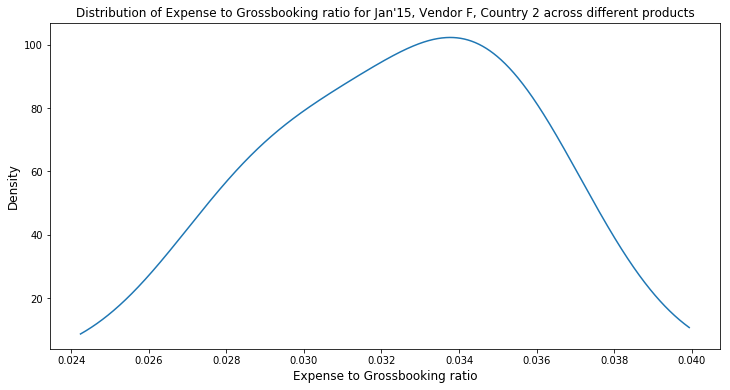

In [3488]:
plt.figure(figsize= (12, 6))
df[(df['Vendor_Name'] == 'Vendor F') & (df['Country'] == 'Country 2') 
    & (df['Date'] == '2015-01-01')]['output'].plot(kind = 'kde')

plt.title("Distribution of Expense to Grossbooking ratio for Jan'15, Vendor F, Country 2 across different products")
plt.xlabel('Expense to Grossbooking ratio', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()

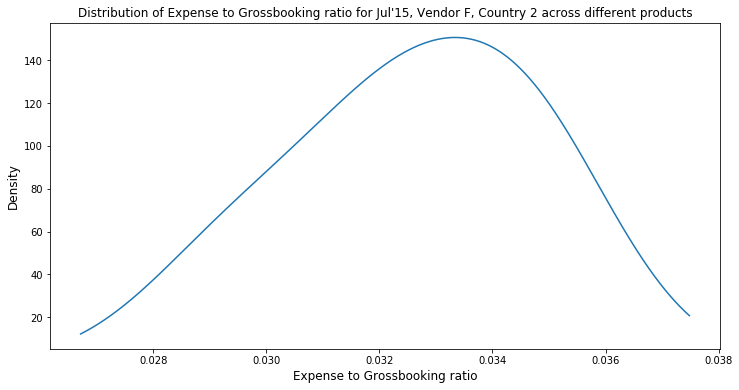

In [3489]:
plt.figure(figsize= (12, 6))
df[(df['Vendor_Name'] == 'Vendor F') & (df['Country'] == 'Country 2') 
    & (df['Date'] == '2015-07-01')]['output'].plot(kind = 'kde')

plt.title("Distribution of Expense to Grossbooking ratio for Jul'15, Vendor F, Country 2 across different products")
plt.xlabel('Expense to Grossbooking ratio', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()

Clearly, from the above plots we notice that the fees or expense to gross booking ratio is closely normally distributed for the same vendor & country and for the same month. Hence, it would be appropriate to impute the null values in the output column by the mean of the output values in the same group.

We will group the data by Date, Vendor, Country and then impute the null values in the output column by the mean of values in the output column within its group. 

In [3490]:
#fill the nan values in output column by imputing the mean for the same Date, Vendor & Country data points
df["output"].fillna(df.groupby(["Date", 'Vendor_Name', 'Country'])["output"].transform("mean"), inplace=True)
df['output'].isnull().sum()

184

We see that the number of null values in output column reduced from 255 to 184 by our mean imputation. 

However, there were rows which had no match with the same month, vendor and country which are still null in output column. Let us remove them.

In [3491]:
df[df['output'].isnull()]['Vendor_Name'].value_counts()

Vendor F    181
Vendor B      2
Vendor A      1
Name: Vendor_Name, dtype: int64

In [3492]:
#drop the other rows that had nan in output or country columns
df = df.dropna(subset= ['output'])

In [3493]:
df.isnull().sum()

Date               0
Vendor_Name        0
Country            0
Product            0
Gross_Bookings    39
Fees              32
output             0
dtype: int64

In [3494]:
df.shape

(7706, 7)

We will make 2 separate dataframes, one with rows having null in fees column and other with rows having null in gross bookings column. We will use the output values which were mean imputed to fill null in fees and gross booking columns respectively.

In [3495]:
df_fees_nan = df[df['Fees'].isnull()]
df_fees_nan.shape

(32, 7)

In [3496]:
df_GB_nan = df[df['Gross_Bookings'].isnull()]#
df_GB_nan.shape

(39, 7)

In [3497]:
#drop the nan rows from the main DF for now
df = df.dropna()

In [3498]:
df.isnull().sum()

Date              0
Vendor_Name       0
Country           0
Product           0
Gross_Bookings    0
Fees              0
output            0
dtype: int64

In [3499]:
df.shape

(7635, 7)

In [3500]:
#fill nan in fees column by the product of output and gross bookings
df_fees_nan['Fees'] = df_fees_nan['Gross_Bookings'] * df_fees_nan['output']
df_fees_nan.head()

,Date,Vendor_Name,Country,Product,Gross_Bookings,Fees,output
71,2015-01-01,Vendor A,Country 35,Product 12,2.33,0.084757,0.036376
168,2015-01-01,Vendor A,Country 19,Product 10,0.44,0.036086,0.082013
192,2015-01-01,Vendor D,Country 2,Product 14,585.99,23.373900,0.039888
358,2015-02-01,Vendor D,Country 2,Product 14,562.81,25.424208,0.045174
779,2015-03-01,Vendor D,Country 2,Product 14,775.12,29.859289,0.038522


In [3501]:
#fill nan in gross bookings column by the ratio of fees and output
df_GB_nan['Gross_Bookings'] = df_GB_nan['Fees'] / df_GB_nan['output']
df_GB_nan.head()

,Date,Vendor_Name,Country,Product,Gross_Bookings,Fees,output
281,2015-01-01,Vendor F,Country 2,Product 6,4953.359993,160.94,0.032491
283,2015-01-01,Vendor D,Country 2,Product 16,243407.505846,9709.01,0.039888
359,2015-02-01,Vendor D,Country 2,Product 16,145880.913131,6589.98,0.045174
520,2015-02-01,Vendor F,Country 2,Product 6,5976.963930,191.28,0.032003
643,2015-03-01,Vendor D,Country 2,Product 16,198733.453403,7655.64,0.038522


In [3502]:
#concat the above 2 tables with filled nan values to the main DataFrame
frames = [df, df_fees_nan, df_GB_nan]
df = pd.concat(frames)
df.shape

(7706, 7)

In [3503]:
df.isnull().sum()

Date              0
Vendor_Name       0
Country           0
Product           0
Gross_Bookings    0
Fees              0
output            0
dtype: int64

In [3504]:
df = df.drop(columns=['output'])
df.shape

(7706, 6)

In [3505]:
df.describe().round(1)

,Gross_Bookings,Fees
count,7706.0,7706.0
mean,443322.7,15489.6
std,3096809.3,122943.1
min,0.0,0.0
25%,76.5,3.1
50%,2523.7,105.5
75%,39668.4,1361.9
max,68736613.8,6135380.5


## Exploratory Data Analysis

In [3506]:
df1.head()

,Date,Vendor_Name,Country,Product,Gross_Bookings,Fees
0,2015-01-01,Vendor A,Country 1,Product 1,63.34,2015-01-01
1,2015-01-01,Vendor A,Country 2,Product 2,39295.41,2015-01-01
2,2015-01-01,Vendor A,Country 3,Product 3,127.25,2015-01-01
3,2015-01-01,Vendor A,Country 4,Product 1,4.85,2015-01-01
4,2015-01-01,Vendor A,Country 5,Product 4,4734.94,2015-01-01


In [3507]:
df['plotting_date'] = df['Date'].dt.date
df.dtypes

Date              datetime64[ns]
Vendor_Name               object
Country                   object
Product                   object
Gross_Bookings           float64
Fees                     float64
plotting_date             object
dtype: object

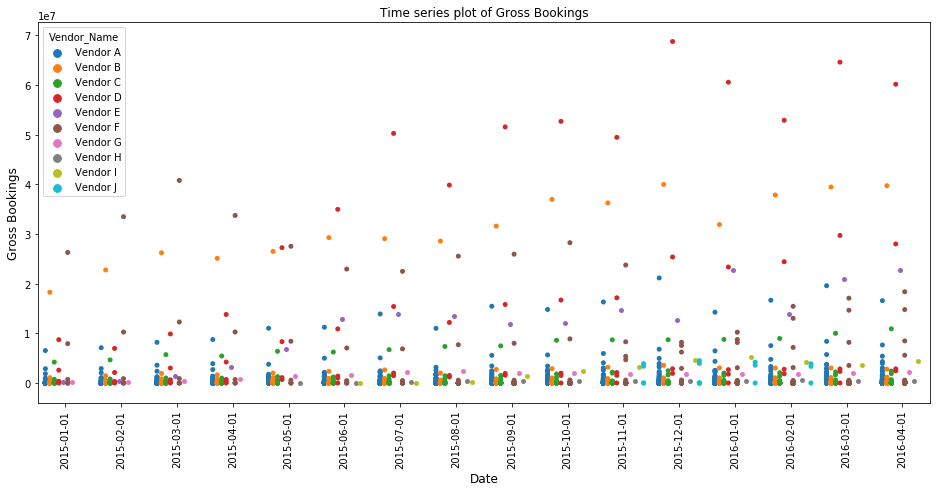

In [3508]:
plt.figure(figsize= (16, 7))

sb.stripplot(x="plotting_date", y="Gross_Bookings", hue="Vendor_Name", data=df, dodge= True)

plt.title("Time series plot of Gross Bookings")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Gross Bookings', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

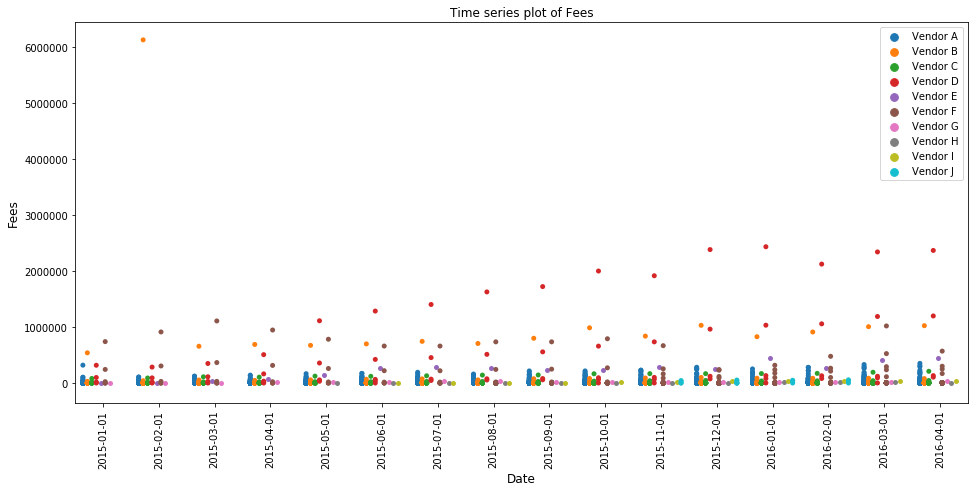

In [3509]:
plt.figure(figsize= (16, 7))

sb.stripplot(x="plotting_date", y="Fees", hue="Vendor_Name", data=df, dodge= True)

plt.title("Time series plot of Fees")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Fees', fontsize = 12)
plt.xticks(rotation='vertical')
plt.legend(loc = 'best')
plt.show()

Let us remove outliers which are unlikely to occur again.

In [3510]:
df = df[df['Fees'] < 4000000]
df.shape

(7705, 7)

In [3511]:
top_countries = df['Country'].value_counts()[:5]
top_countries

Country 2     312
Country 7     203
Country 35    188
Country 1     178
Country 25    177
Name: Country, dtype: int64

In [3512]:
df_country = df[(df['Country'] == 'Country 2') | (df['Country'] == 'Country 7')| (df['Country'] == 'Country 35')
                | (df['Country'] == 'Country 1')| (df['Country'] == 'Country 25')]

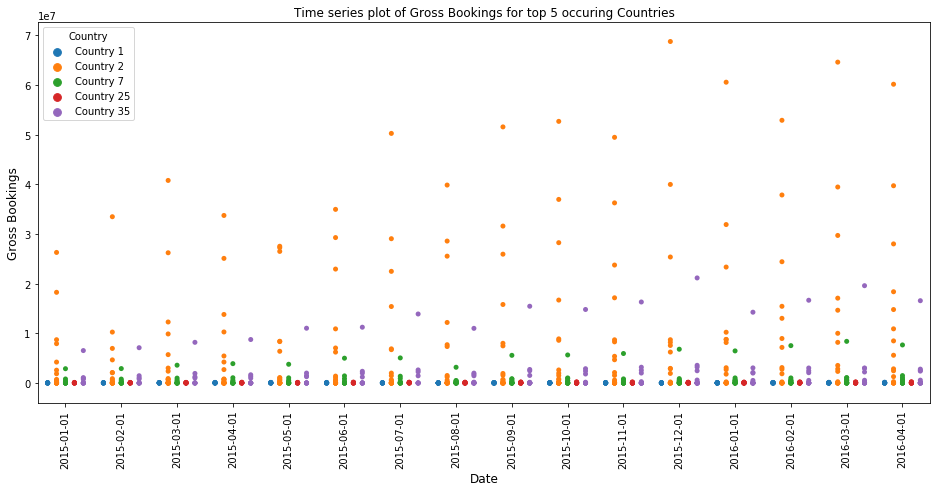

In [3513]:
plt.figure(figsize= (16, 7))

sb.stripplot(x="plotting_date", y="Gross_Bookings", hue="Country", data = df_country, dodge= True)

plt.title("Time series plot of Gross Bookings for top 5 occuring Countries")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Gross Bookings', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

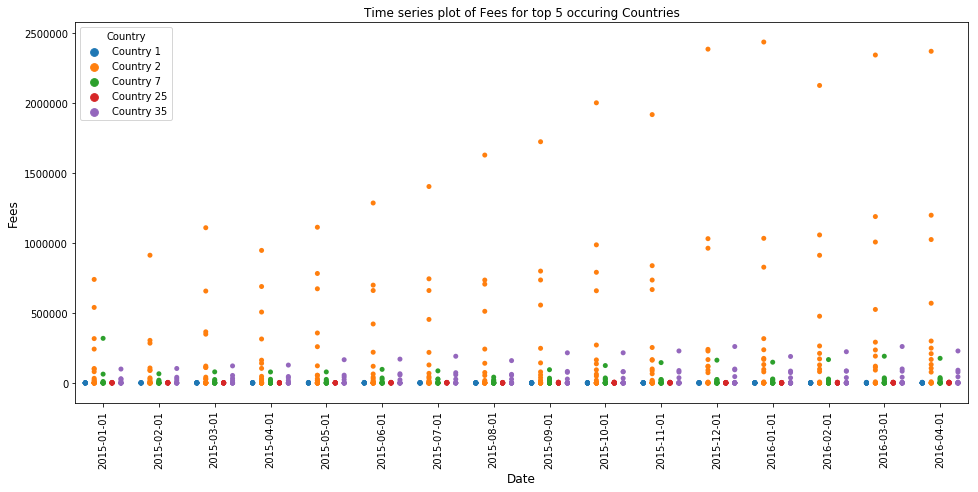

In [3514]:
plt.figure(figsize= (16, 7))

sb.stripplot(x="plotting_date", y="Fees", hue="Country", data = df_country, dodge= True)

plt.title("Time series plot of Fees for top 5 occuring Countries")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Fees', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

In [3515]:
top_products = df['Product'].value_counts()[:5]
top_products

Product 9     1452
Product 4     1446
Product 2      666
Product 3      632
Product 10     624
Name: Product, dtype: int64

In [3516]:
df_products = df[(df['Product'] == 'Product 9') | (df['Product'] == 'Product 4')| (df['Product'] == 'Product 2')
                | (df['Product'] == 'Product 3')| (df['Product'] == 'Product 10')]

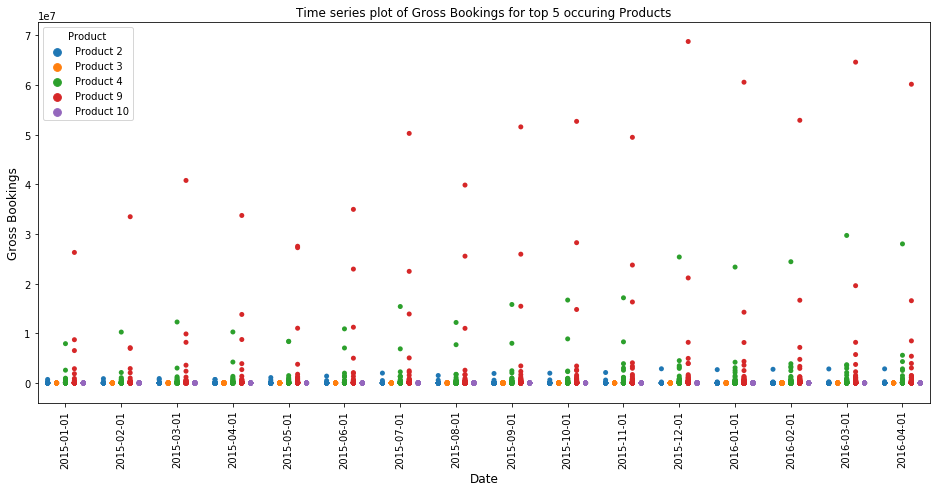

In [3517]:
plt.figure(figsize= (16, 7))

sb.stripplot(x="plotting_date", y="Gross_Bookings", hue="Product", data = df_products, dodge= True)

plt.title("Time series plot of Gross Bookings for top 5 occuring Products")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Gross Bookings', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

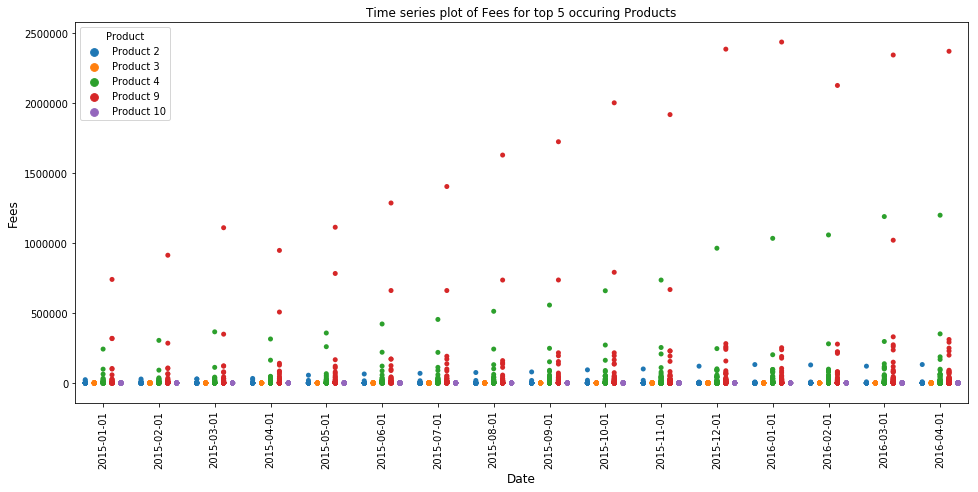

In [3518]:
plt.figure(figsize= (16, 7))

sb.stripplot(x="plotting_date", y="Fees", hue="Product", data = df_products, dodge= True)

plt.title("Time series plot of Fees for top 5 occuring Products")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Fees', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

We could also look at Gross Bookings & Fees for other countries and products and see if we can spot any rare occurences (outliers) that are unlikely to occur again. If so, we could remove those from the data set for better future predictions.

### 2. Building a predictive model to help the company determine the % of Gross Bookings that will be spent in May 2016.

In [3519]:
df_monthly = df.drop(columns= ['Vendor_Name', 'Country', 'Product','plotting_date'])
df_monthly = df.groupby('Date')[['Gross_Bookings', 'Fees']].sum()

In [3520]:
df_monthly

,Gross_Bookings,Fees
Date,,
2015-01-01,9.406190e+07,3.245098e+06
2015-02-01,8.641213e+07,2.714789e+06
2015-03-01,1.347708e+08,4.012718e+06
2015-04-01,1.350809e+08,4.268729e+06
2015-05-01,1.595319e+08,5.221278e+06
2015-06-01,1.785214e+08,5.835189e+06
2015-07-01,2.067084e+08,6.159267e+06
2015-08-01,1.893657e+08,6.446093e+06
2015-09-01,2.244150e+08,7.225958e+06


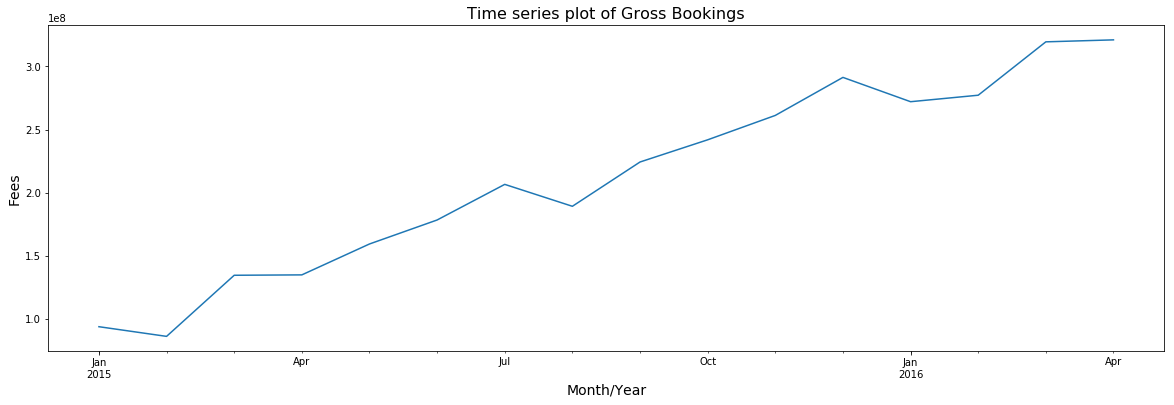

In [3521]:
plt.figure(figsize= (20, 6))
df_monthly['Gross_Bookings'].plot()

plt.title("Time series plot of Gross Bookings", fontsize = 16)
plt.xlabel('Month/Year', fontsize = 14)
plt.ylabel('Fees', fontsize = 14)
plt.show()

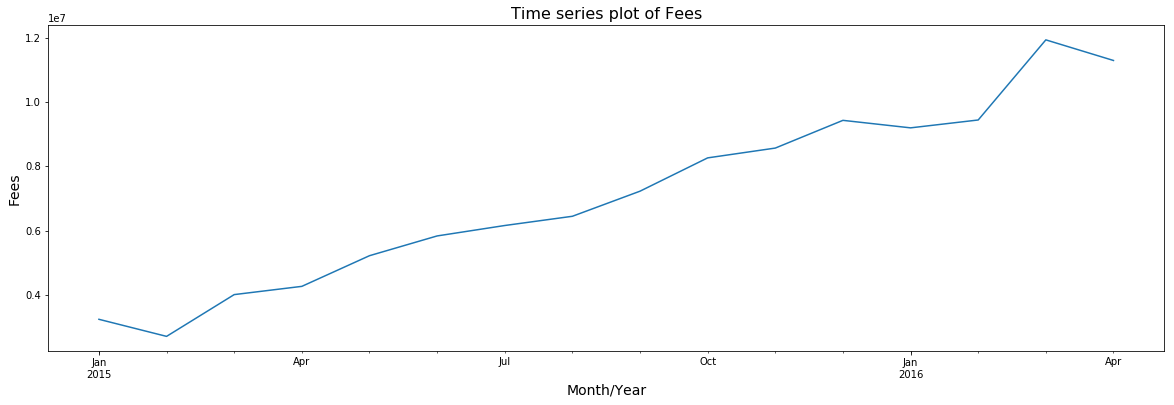

In [3522]:
plt.figure(figsize= (20, 6))
df_monthly['Fees'].plot()

plt.title("Time series plot of Fees", fontsize = 16)
plt.xlabel('Month/Year', fontsize = 14)
plt.ylabel('Fees', fontsize = 14)
plt.show()

### Predicting Gross Booking for May 2016 

In [3523]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(2).mean()
    rolstd = timeseries.rolling(2).std()

    #Plot rolling statistics:
    plt.figure(figsize= (15,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation', fontsize = 16)
    plt.xlabel('Month/Year', fontsize = 14)
    plt.show(block=False)

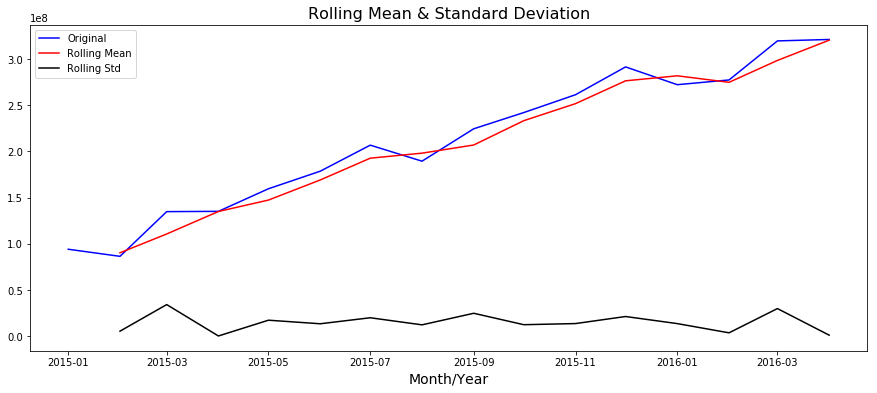

In [3524]:
test_stationarity(df_monthly['Gross_Bookings'])

Though the variation in standard deviation is small, mean is increasing with time and this is not a stationary series. This suggests that the time series will require differencing to make it stationary, at least a difference order of 1 (d >= 1).

Let us run a staistical test to check if the time series is stationary or not.

In [3525]:
from statsmodels.tsa.stattools import adfuller

In [3526]:
X = df_monthly['Gross_Bookings'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


As p-value > 0.05, we fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. We would require differencing to make the data stationary. 

In [3527]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [3528]:
#Take differencing of Gross Bookings and remove the null generated
gross_bookings_diff = df_monthly['Gross_Bookings'].diff().dropna()

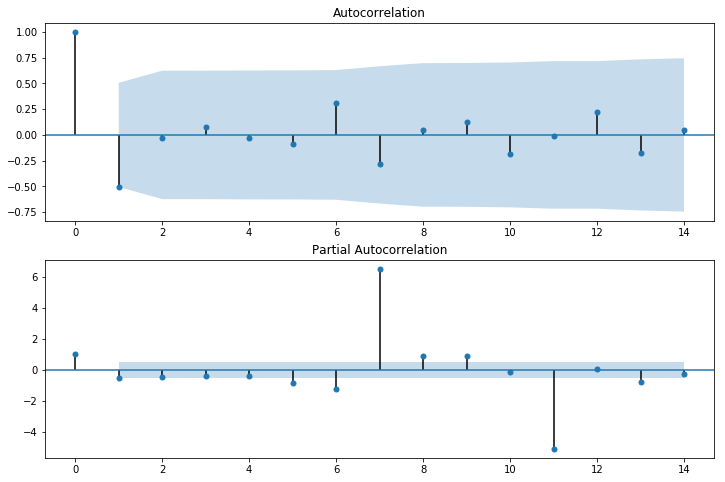

In [3529]:
#Plot autocorrelation and partial autocorrelation plots to get an idea about the values of 
#the parameters that we will use for ARIMA model.

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gross_bookings_diff, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gross_bookings_diff, ax=ax2)
plt.show()

Below are some observations from the plots (we are looking for spikes outside of the shaded confidence intervals): 

The ACF shows a significant lag for 1 month.
The PACF shows a significant lag for perhaps 4 months.

This quick analysis suggests an ARIMA(1,1,4) on the raw data may be a good starting point.

We fit an ARIMA(p, d, q) model, the lag value is p for autoregression, uses a difference order of d to make the time series stationary, and uses a moving average model of q.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

Note: Experimentation shows that the configuration of ARIMA does not converge and results in errors by the underlying library. Some experimentation shows that the model does not appear to be stable, with non-zero AR (p) and MA (q) orders defined at the same time.

The model can be simplified to ARIMA(2,1,0).

In [3530]:
model = ARIMA(gross_bookings_diff, order=(2, 1, 0))
model_fit = model.fit(disp=0)

In [3531]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.Gross_Bookings   No. Observations:                   14
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -257.209
Method:                       css-mle   S.D. of innovations       22013713.339
Date:                Mon, 03 Sep 2018   AIC                            522.418
Time:                        22:31:12   BIC                            524.974
Sample:                    03-01-2015   HQIC                           522.181
                         - 04-01-2016                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    6.58e+05   2.45e+06      0.268      0.793   -4.15e+06    5.46e+06
ar.L1.D.Gross_Bookings    -1.0232      0.224     -4.575      0.001      -1.462      -0.585
ar.L

The summary attribute that results from the output of ARIMAX returns a significant amount of information, but we'll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. 

The P>|z| column informs us of the significance of each feature weight. Here, weight having a p-value lower than 0.05 suggest that it is significant for our prediction model.

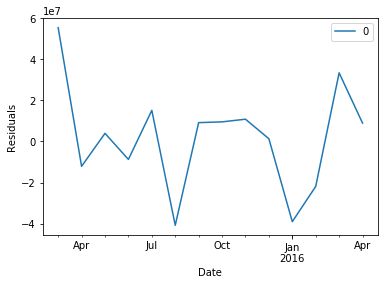

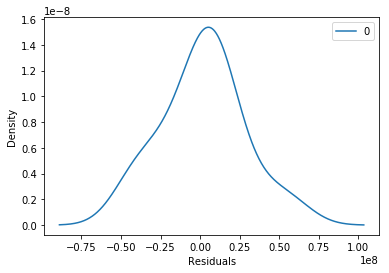

                  0
count  1.400000e+01
mean   1.781832e+06
std    2.577976e+07
min   -4.079874e+07
25%   -1.126203e+07
50%    6.432849e+06
75%    1.049405e+07
max    5.535037e+07


In [3532]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.ylabel('Residuals')

residuals.plot(kind= 'kde')
plt.xlabel('Residuals')
plt.show()

print(residuals.describe())

First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model. 

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

In [3533]:
pred_gb_diff, stderr, cnf = model_fit.forecast()
print('Prediction of Gross Booking difference for May & April 2016: {}'.format(round(pred_gb_diff[0]), 2))
print('95% confidence interval: ',(round(cnf[0][0], 2), round(cnf[0][1], 2)))

Prediction of Gross Booking difference for May & April 2016: 24573428.0
95% confidence interval:  (-18572657.18, 67719513.44)


In [3534]:
gb = (df_monthly['Gross_Bookings'][-1] + pred_gb_diff)
print("Prediction of Uber's Gross bookings for May 2016 is {}".format(np.round(gb[0], 3)))

Prediction of Uber's Gross bookings for May 2016 is 345650640.532


### Predicting Fees for May 2016 

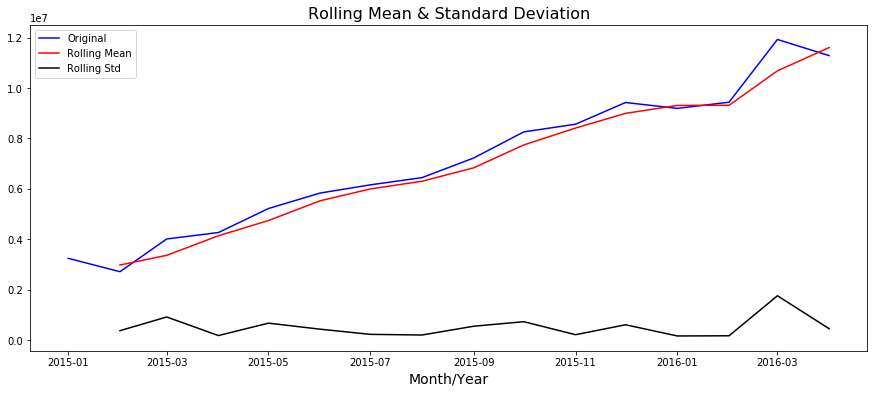

In [3535]:
test_stationarity(df_monthly['Fees'])

Though the variation in standard deviation is small, mean is increasing with time and this is not a stationary series. This suggests that the time series will require differencing to make it stationary, at least a difference order of 1 (d >= 1).

Let us run a staistical test to check if the time series for Fees is stationary or not.

In [3536]:
X2 = df_monthly['Fees'].values
result2 = adfuller(X2)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


As p-value > 0.05, we fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. We would require differencing to make the data stationary for ARIMA model. 

In [3537]:
# Take differencing of Fees and remove the null generated
fees_diff = df_monthly['Fees'].diff().dropna()

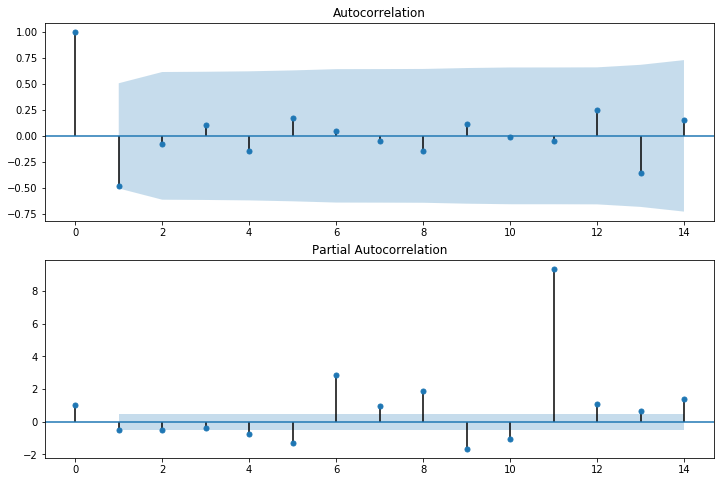

In [3538]:
#Plot autocorrelation and partial autocorrelation plots to get an idea about the values of 
#the parameters that we will use for ARIMA model.
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(fees_diff, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(fees_diff, ax=ax2)
plt.show()

Below are some observations from the plots: 

The ACF shows a significant lag for 1 month.
The PACF shows a significant lag for perhaps 8 months.

Note: Experimentation shows that the above configuration of ARIMA does not converge and results in errors by the underlying library. Some experimentation shows that the model does not appear to be stable, with non-zero AR (p) and MA (q) orders defined at the same time.

The model can be simplified to ARIMA(2,1,0).

In [3539]:
model_fees = ARIMA(fees_diff, order=(2, 1, 0))
model_expense = model_fees.fit(disp=0)

In [3540]:
print(model_expense.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Fees   No. Observations:                   14
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -210.220
Method:                       css-mle   S.D. of innovations         749306.944
Date:                Mon, 03 Sep 2018   AIC                            428.441
Time:                        22:31:13   BIC                            430.997
Sample:                    03-01-2015   HQIC                           428.204
                         - 04-01-2016                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.632e+04   7.54e+04      0.349      0.734   -1.21e+05    1.74e+05
ar.L1.D.Fees    -1.1677      0.242     -4.829      0.001      -1.642      -0.694
ar.L2.D.Fees    -0.6936      0.246     -2.82

The summary attribute that results from the output of ARIMAX returns a significant amount of information, but we'll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. 

The P>|z| column informs us of the significance of each feature weight. Here, weight having a p-value lower than 0.05 suggest that it is significant for our prediction model.

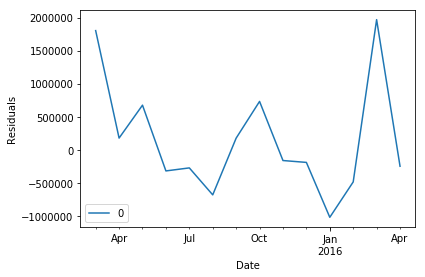

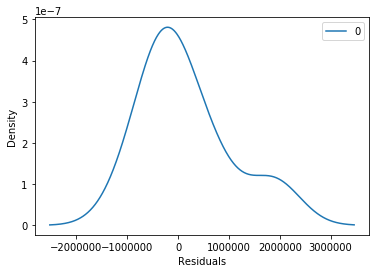

                  0
count  1.400000e+01
mean   1.503329e+05
std    8.736183e+05
min   -1.025934e+06
25%   -3.117978e+05
50%   -1.800408e+05
75%    5.480170e+05
max    1.968046e+06


In [3541]:
# plot residual errors
residuals = pd.DataFrame(model_expense.resid)
residuals.plot()
plt.ylabel('Residuals')

residuals.plot(kind= 'kde')
plt.xlabel('Residuals')
plt.show()

print(residuals.describe())

First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model. 

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

In [3542]:
expense_diff, stderr, cnf = model_expense.forecast()
print('Prediction of difference of Expense for May & April 2016: {}'.format(round(expense_diff[0]), 2))
print('95% confidence interval: ',(round(cnf[0][0], 2), round(cnf[0][1], 2)))

Prediction of difference of Expense for May & April 2016: 1532482.0
95% confidence interval:  (63867.39, 3001096.64)


In [3543]:
expense_may = df_monthly['Fees'][-1] + expense_diff[0]
print("Prediction of Uber's Expense for May 2016 is {}".format(np.round(expense_may, 2)))

Prediction of Uber's Expense for May 2016 is 12819356.07


In [3544]:
expense_as_percent_of_grossbooking = (expense_may / gb) * 100
print("Prediction of Uber's Expense as a percentage of gross bookings for May 2016 is {}".format(np.round(expense_as_percent_of_grossbooking[0], 2)),'%')

Prediction of Uber's Expense as a percentage of gross bookings for May 2016 is 3.71 %


### Why I chose  Auto-Regressive Integrated Moving Average (ARIMA) ?

1. ARIMA is quite flexible in modeling different types of data. By changing the model's parameters, we can model ARIMA for random trend, exponential smoothing and auto-regressive models. 
2. The data for both Gross Bookings & Fees showed increasing trend which could have been stationarized by differencing or appropriate transformations as ARIMA requires data to be stationary.
3. Data didn't show any seasonality attached with it otherwise it would have to be separated or we would have used Seasonal ARIMA.
4. We had data of 16 seasons which was enough to model an ARIMA. Usually data of atleast 4 seasons is required to model an ARIMA.

### What alternatives did I consider?

I had considered Moving Average & Exponential Smoothing method as the data had increasing trend. However, these methods didn't do well when I evaluated them on a validation set using Root Mean Square error metric because they work well when the mean of the series is varying slowly and randomly without persistent trends.

### Any concerns that I have?

1. The residual analysis shows that the model is biased and some trend information may still not be captured by the model. I would be curious to see how the model does if we could use a grid search technique to model all different combinations of the parameters. Although, it might be computationally expensive to try out all different combinations of parameters.
2. There are different techniques to stationarize the data other than differencing like using an appropriate transformation like Box-Cox. I would love to experiment with such other techniques to improve the prediction accuracy of the ARIMA model.

### How valid is my model? Include any key indicators of model performance.

My model is optimized to minimize Akaike information criterion (AIC). AIC score does a trade off between fit of the model and its simplicity. A model with a large number of features that fits the data very well would be assigned a larger AIC than a model with less number of features with the same fit.

AIC for Gross Bookings prediction model: 522.418, and
AIC for Fees prediction model: 428.441.

We can also look at the p-values for our predictors as shown below which being less than 0.05 indicates the significance of the variables of the prediction model.

In [3545]:
print('For Gross Bookings prediction model', model_fit.summary().tables[1])

For Gross Bookings prediction model ==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    6.58e+05   2.45e+06      0.268      0.793   -4.15e+06    5.46e+06
ar.L1.D.Gross_Bookings    -1.0232      0.224     -4.575      0.001      -1.462      -0.585
ar.L2.D.Gross_Bookings    -0.5471      0.236     -2.321      0.040      -1.009      -0.085


In [3546]:
print('For Fees prediction model', model_expense.summary().tables[1])

For Fees prediction model ================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.632e+04   7.54e+04      0.349      0.734   -1.21e+05    1.74e+05
ar.L1.D.Fees    -1.1677      0.242     -4.829      0.001      -1.642      -0.694
ar.L2.D.Fees    -0.6936      0.246     -2.824      0.017      -1.175      -0.212
